# Práctica 1.1: Muestreo, Cuantización, Reconstrucción y Solapamiento

## Introducción

En esta práctica, vamos a estudiar los conceptos fundamentales de procesamiento de señales, como el muestreo, cuantización, reconstrucción de señales y el solapamiento. A través de ejemplos, visualizaciones y código Python, aprenderemos cómo cada proceso afecta la señal y qué errores pueden surgir cuando no se aplican correctamente.

---

## 1. Muestreo

El muestreo es el proceso de convertir una señal continua en el tiempo en una señal discreta, tomando muestras de la señal original en intervalos regulares.

### Ejemplo de Muestreo

Tomemos una señal sinusoidal $x(t) = \sin(2\pi f t)$, con una frecuencia de $f = 15 Hz$, y muestremos la señal con diferentes frecuencias de muestreo $F_s$.

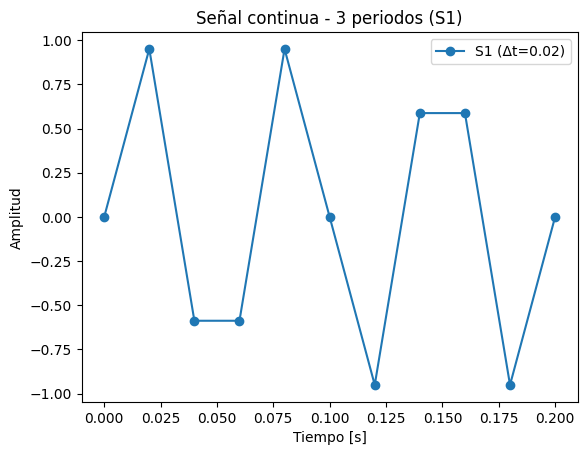

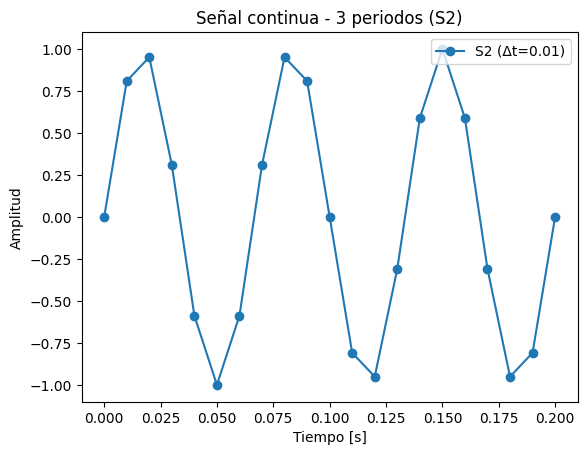

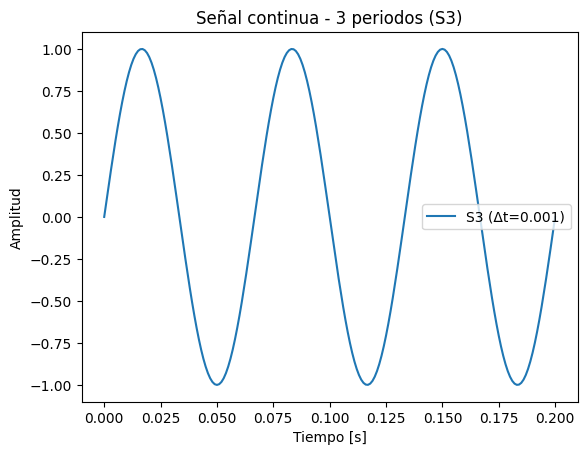

Número de muestras en S1 (Δt=0.02):   11
Número de muestras en S2 (Δt=0.01):  21
Número de muestras en S3 (Δt=0.001): 201


In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = 15  # Frecuencia de la señal en Hz
T = 1 / f  # Periodo de la señal
num_periodos = 3

# Ejes temporales para 3 periodos con diferentes resoluciones
t_cont1 = np.arange(0, num_periodos * T + 1/50, 1/50)
t_cont2 = np.arange(0, num_periodos * T + 1/100, 1/100)
t_cont3 = np.arange(0, num_periodos * T + 1/1000, 1/1000)

# Señales
x_cont1 = np.sin(2 * np.pi * f * t_cont1)
x_cont2 = np.sin(2 * np.pi * f * t_cont2)
x_cont3 = np.sin(2 * np.pi * f * t_cont3)

# Gráficas
plt.figure()
plt.plot(t_cont1, x_cont1, 'o-', label='S1 (Δt=0.02)')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal continua - 3 periodos (S1)')

plt.figure()
plt.plot(t_cont2, x_cont2, 'o-', label='S2 (Δt=0.01)')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal continua - 3 periodos (S2)')

plt.figure()
plt.plot(t_cont3, x_cont3, label='S3 (Δt=0.001)')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal continua - 3 periodos (S3)')

plt.show()

# Mostrar número de muestras
print(f"Número de muestras en S1 (Δt=0.02):   {len(t_cont1)}")
print(f"Número de muestras en S2 (Δt=0.01):  {len(t_cont2)}")
print(f"Número de muestras en S3 (Δt=0.001): {len(t_cont3)}")



1. Definimos una frecuencia f=15 Hz. Esto significa que la onda completa 15 ciclos en un segundo. El periodo T es el tiempo que tarda un solo ciclo:
T=1/f​​≈0.0667 s
2. El Diferencial de Tiempo (Δt)

El código utiliza tres resoluciones distintas para el eje del tiempo. En procesamiento de señales, esto se relaciona con la Frecuencia de Muestreo (fs​=1/Δt):

    S1 (Δt=0.02 s): Equivale a una fs​=50 Hz.

    S2 (Δt=0.01 s): Equivale a una fs​=100 Hz.

    S3 (Δt=0.001 s): Equivale a una fs​=1000 Hz.

3. ¿Qué observar en las gráficas?
Señal	Resolución	Observación Visual
S1	Muy baja	La onda se ve "picuda" o poligonal. Hay muy pocos puntos para definir la curva suave del seno.
S2	Media	La forma de la onda es más reconocible, pero aún se notan los segmentos rectos entre puntos.
S3	Alta	La señal parece una línea continua y suave. Es la representación que más se acerca a una señal analógica real.



Para que una señal digital represente correctamente a una analógica sin perder su identidad (evitar el aliasing), debes muestrear al menos al doble de la frecuencia máxima de la señal.

    Tu señal es de 15 Hz.

    El mínimo de Nyquist sería 30 Hz.

    S1 (50 Hz) cumple por poco el mínimo técnico, pero como puedes ver en tu gráfica, "cumplir el mínimo" no significa que la señal se vea bien estéticamente; solo significa que la información de la frecuencia no se pierde.

### Código:

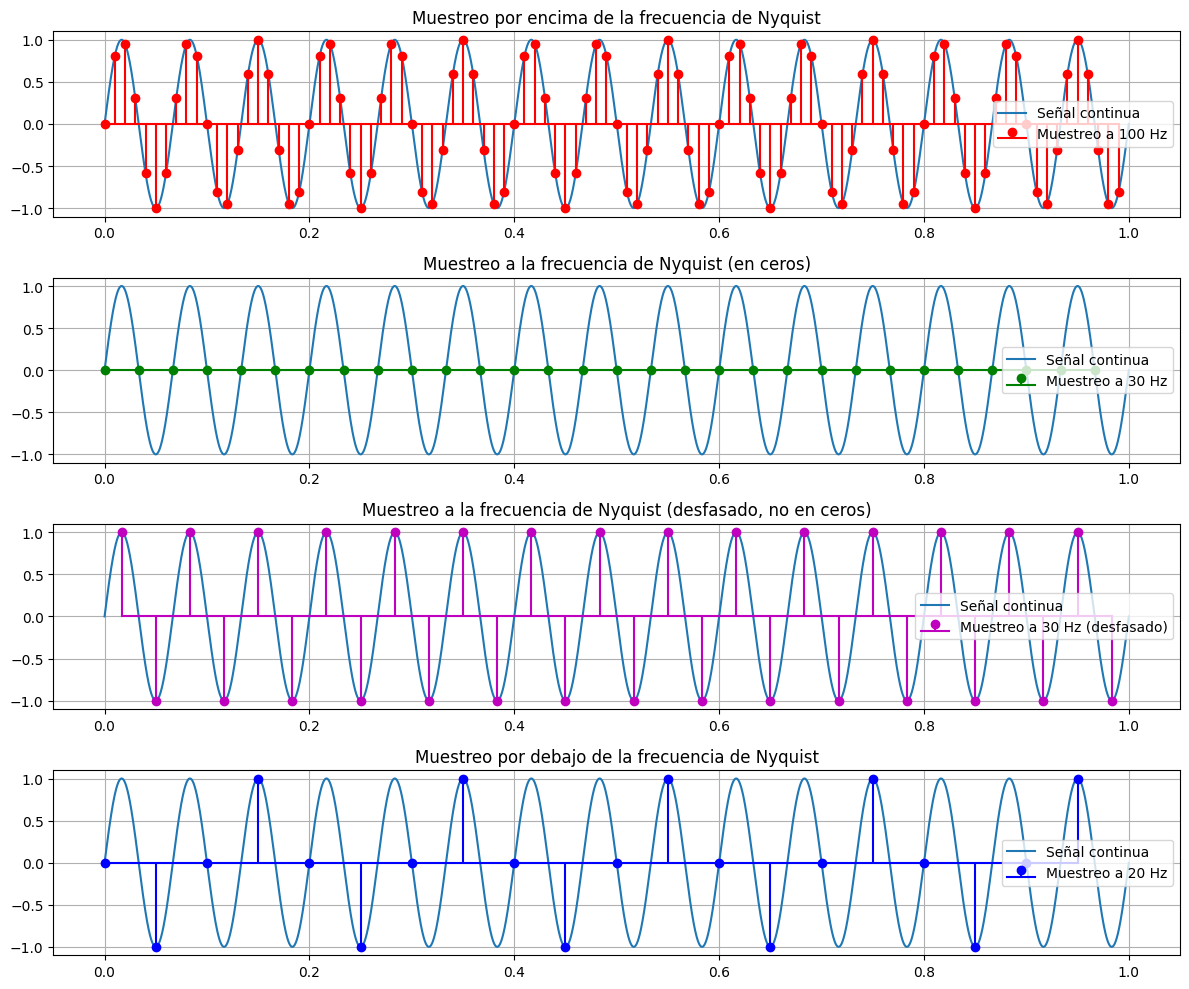

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
f = 15  # Frecuencia de la señal en Hz
Fs1 = 100  # Frecuencia de muestreo (por encima de Nyquist)
Fs2 = 30   # Frecuencia de muestreo (igual a Nyquist)
Fs2b = 30  # Mismo Fs, pero con desfase temporal
Fs3 = 20   # Frecuencia de muestreo (por debajo de Nyquist)

# Señal continua de referencia
t_cont = np.linspace(0, 1, 10000)
x_cont = np.sin(2 * np.pi * f * t_cont)

# Función de muestreo
def sample_signal(f, Fs, t_max=1, shift=0):
    """
    f: frecuencia de la señal
    Fs: frecuencia de muestreo
    t_max: duración total
    shift: desplazamiento temporal (en segundos)
    """
    t_samples = np.arange(shift, t_max, 1/Fs)
    x_samples = np.sin(2 * np.pi * f * t_samples)
    return t_samples, x_samples

# Muestreos
t_s1, x_s1 = sample_signal(f, Fs1)
t_s2, x_s2 = sample_signal(f, Fs2)
t_s2b, x_s2b = sample_signal(f, Fs2b, shift=1/(2*Fs2b))  # desplazado medio periodo de muestreo
t_s3, x_s3 = sample_signal(f, Fs3)

# Visualización
plt.figure(figsize=(12, 10))

# Caso 1: Por encima de Nyquist
plt.subplot(4, 1, 1)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s1, x_s1, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Muestreo a {Fs1} Hz')
plt.title('Muestreo por encima de la frecuencia de Nyquist')
plt.legend()
plt.grid(True)

# Caso 2: A la frecuencia de Nyquist (en ceros)
plt.subplot(4, 1, 2)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s2, x_s2, linefmt='g-', markerfmt='go', basefmt='g-', label=f'Muestreo a {Fs2} Hz')
plt.title('Muestreo a la frecuencia de Nyquist (en ceros)')
plt.legend()
plt.grid(True)

# Caso 2b: A la frecuencia de Nyquist, desplazado
plt.subplot(4, 1, 3)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s2b, x_s2b, linefmt='m-', markerfmt='mo', basefmt='m-', label=f'Muestreo a {Fs2b} Hz (desfasado)')
plt.title('Muestreo a la frecuencia de Nyquist (desfasado, no en ceros)')
plt.legend()
plt.grid(True)

# Caso 3: Por debajo de Nyquist
plt.subplot(4, 1, 4)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s3, x_s3, linefmt='b-', markerfmt='bo', basefmt='b-', label=f'Muestreo a {Fs3} Hz')
plt.title('Muestreo por debajo de la frecuencia de Nyquist')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



### Explicación:
- La primera señal muestra un muestreo a una frecuencia que está por encima de la frecuencia de Nyquist.
- La segunda muestra un muestreo exacto a la frecuencia de Nyquist.
- La tercera muestra un ejemplo de solapamiento cuando el muestreo es insuficiente.

---

## 2. Cuantización

La cuantización es el proceso de convertir una señal muestreada (que aún tiene valores continuos) en una señal con valores discretos en un conjunto finito de niveles.

### Implementación Manual del Cuantizador

A continuación implementaremos un cuantizador sin funciones predefinidas, para una señal muestreada.

### Código:

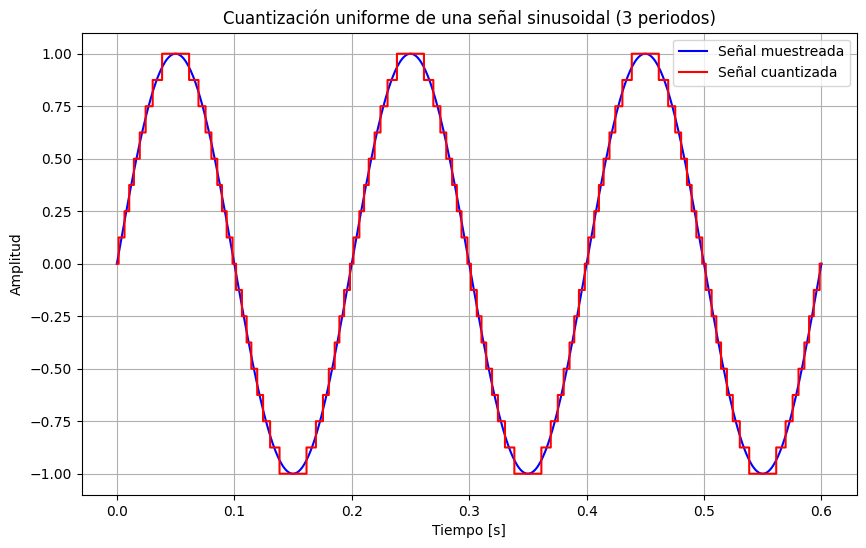

Error de cuantización (MSE): 0.001228


array([ 0.00000000e+00,  3.14107591e-02,  6.27905195e-02,  9.41083133e-02,
        1.25333234e-01,  1.56434465e-01,  1.87381315e-01,  2.18143241e-01,
        2.48689887e-01,  2.78991106e-01,  3.09016994e-01,  3.38737920e-01,
        3.68124553e-01,  3.97147891e-01,  4.25779292e-01,  4.53990500e-01,
        4.81753674e-01,  5.09041416e-01,  5.35826795e-01,  5.62083378e-01,
        5.87785252e-01,  6.12907054e-01,  6.37423990e-01,  6.61311865e-01,
        6.84547106e-01,  7.07106781e-01,  7.28968627e-01,  7.50111070e-01,
        7.70513243e-01,  7.90155012e-01,  8.09016994e-01,  8.27080574e-01,
        8.44327926e-01,  8.60742027e-01,  8.76306680e-01,  8.91006524e-01,
        9.04827052e-01,  9.17754626e-01,  9.29776486e-01,  9.40880769e-01,
        9.51056516e-01,  9.60293686e-01,  9.68583161e-01,  9.75916762e-01,
        9.82287251e-01,  9.87688341e-01,  9.92114701e-01,  9.95561965e-01,
        9.98026728e-01,  9.99506560e-01,  1.00000000e+00,  9.99506560e-01,
        9.98026728e-01,  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
f = 5  # Frecuencia de la señal (Hz)
num_periodos = 3
T = 1 / f
t_max = num_periodos * T

Fs = 1000  # Frecuencia de muestreo (Hz)
t_s = np.arange(0, t_max, 1/Fs)
x_s = np.sin(2 * np.pi * f * t_s)  # Señal muestreada

# Parámetros del cuantizador
## CUANTIXAZDOR DE 4 BITS 2⁴
num_levels = 16  # Número de niveles de cuantización (menos niveles => más error visible)
xmin, xmax = -1, 1  # Rango de la señal
delta = (xmax - xmin) / num_levels  # Paso de cuantización

# Función de cuantización manual
def cuantizador(x, xmin, xmax, num_levels):
    delta = (xmax - xmin) / num_levels
    x_q = np.clip(x, xmin, xmax)  # Limitar valores al rango
    x_q = np.round((x_q - xmin) / delta) * delta + xmin  # **Cuantización uniforme 
    #Primero vemos a que nivel de cauntizacion corresponde y luego lo volvemos dde nuevo al numero entero 
    return x_q


#**archivo expliacion cuantizador



# Cuantización de la señal muestreada
xq_s = cuantizador(x_s, xmin, xmax, num_levels)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(t_s, x_s, 'b-', label='Señal muestreada')
plt.step(t_s, xq_s, 'r', where='mid', label='Señal cuantizada')
plt.title(f'Cuantización uniforme de una señal sinusoidal ({num_periodos} periodos)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo del error de cuantización (MSE)
error_cuantizacion = np.mean((x_s - xq_s)**2)
print(f"Error de cuantización (MSE): {error_cuantizacion:.6f}")

La cuantización consiste en convertir valores continuos (infinitos decimales) en un conjunto finito de valores discretos. Tres pasos clave:

    Normalización: (x_q - xmin) / delta

    Calculas cuántas veces cabe el "paso de cuantización" (Δ) en la señal. Esto convierte el voltaje en un número de "escalón" (índice).

    Redondeo: np.round(...)

    Aquí es donde ocurre la pérdida de información. Forzamos a que el valor sea un número entero (el escalón más cercano).

    Des-normalización: * delta + xmin

    Convertimos ese número de escalón de vuelta a un valor de amplitud (voltaje aproximado).

### Explicación:
El proceso de cuantización asigna cada muestra muestreada a un nivel de cuantización en un rango discreto, lo que introduce un error conocido como ruido de cuantización.

---

## 3. Reconstrucción

La reconstrucción es el proceso de convertir una señal cuantizada y muestreada de nuevo en una señal continua. El interpolador más común es el filtro paso bajo ideal, pero aquí usaremos una interpolación lineal simple para demostrar el concepto.

### Código:

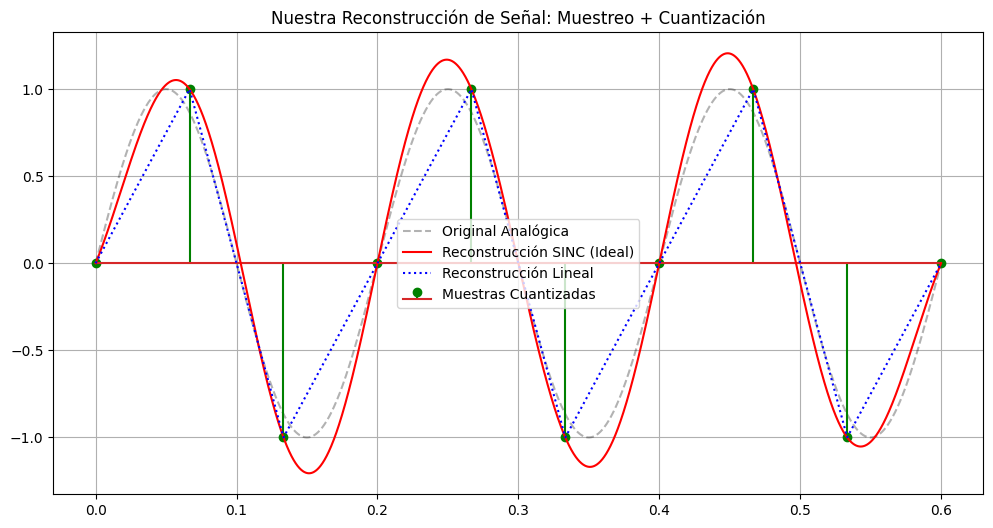

Nuestro Error Final (Sinc): 0.015499


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# --- 1. PARÁMETROS DE LA SEÑAL ---
f = 5  
num_periodos = 3
T = 1 / f
t_max = num_periodos * T

# --- 2. MUESTREO (Proceso Digital) ---
Fs = 15  # Frecuencia de muestreo
t_s = np.arange(0, t_max, 1/Fs)
x_s = np.sin(2 * np.pi * f * t_s)

# --- 3. CUANTIZACIÓN (Nuestra lógica de niveles) ---
xmin, xmax = -1, 1  # Ajustado al rango del seno
num_levels = 5
delta = (xmax - xmin) / (num_levels - 1)

def cuantizador(x, xmin, xmax, delta):
    x_q = np.clip(x, xmin, xmax)
    # Nuestra fórmula de 5 pasos: traslada, escala, redondea, re-escala y re-traslada
    return np.round((x_q - xmin) / delta) * delta + xmin

x_s_q = cuantizador(x_s, xmin, xmax, delta)

# --- 4. RECONSTRUCCIÓN (Volviendo a lo analógico) ---
t_cont = np.linspace(0, t_max, 5000)
x_cont = np.sin(2 * np.pi * f * t_cont)

def sinc_interpolacion(t, ts, xs):
    x_rec = np.zeros_like(t)
    Ts = ts[1] - ts[0]
    for i in range(len(xs)):
        x_rec += xs[i] * np.sinc((t - ts[i]) / Ts)
    return x_rec

# Diferentes métodos para comparar
lin_rec = interp1d(t_s, x_s_q, kind='linear', fill_value="extrapolate")
near_rec = interp1d(t_s, x_s_q, kind='nearest', fill_value="extrapolate")

x_lin = lin_rec(t_cont)
x_near = near_rec(t_cont)
x_sinc = sinc_interpolacion(t_cont, t_s, x_s_q)

# --- 5. VISUALIZACIÓN ---
plt.figure(figsize=(12, 6))
plt.plot(t_cont, x_cont, 'k--', label='Original Analógica', alpha=0.3)
plt.stem(t_s, x_s_q, linefmt='g-', markerfmt='go', label='Muestras Cuantizadas')
plt.plot(t_cont, x_sinc, 'r-', label='Reconstrucción SINC (Ideal)')
plt.plot(t_cont, x_lin, 'b:', label='Reconstrucción Lineal')
plt.title('Nuestra Reconstrucción de Señal: Muestreo + Cuantización')
plt.legend()
plt.grid(True)
plt.show()

# --- 6. ANÁLISIS DE ERROR (MSE) ---
err_sinc = np.mean((x_sinc - x_cont)**2)
print(f"Nuestro Error Final (Sinc): {err_sinc:.6f}")

### Explicación:
La interpolación lineal permite reconstruir una señal continua a partir de muestras discretas cuantizadas. Sin embargo, el posfiltro ideal (que elimina componentes de alta frecuencia) es necesario para una reconstrucción perfecta.
Para entender por qué nuestro código es ahora una simulación completa de un sistema de comunicación digital, vamos a desglosar los tres procesos que estamos ejecutando simultáneamente:
1. El Muestreo (Discretización en el tiempo)

Primero, tomamos nuestra señal analógica continua y la "fotografiamos" cada cierto tiempo usando Fs=15 Hz.

    Como nuestra señal es de 5 Hz, estamos cumpliendo con Nyquist (15>10), pero estamos muy cerca del límite.

    Esto hace que nuestras muestras estén bastante separadas, lo que pone a prueba la capacidad de los algoritmos de reconstrucción.

2. La Cuantización (Discretización en amplitud)

Aquí es donde aplicamos nuestra lógica de 5 pasos. Hemos definido 5 niveles de amplitud posibles entre −1 y 1.

    El efecto: Aunque el seno original quiera valer 0.73, nuestro cuantizador lo obliga a ser 0.5 o 1.0 (los niveles más cercanos).

    Esto introduce el ruido de cuantización. Por más que intentemos reconstruir la señal después, siempre habrá una pequeña diferencia respecto a la original debido a esta pérdida de precisión inicial.

3. La Reconstrucción (El "milagro" de la Sinc)

Esta es la parte más técnica de nuestro código. Comparamos tres formas de recuperar la información:

    Lineal: Une los puntos con rectas. Es fácil de computar pero genera una señal "picuda" que no existe en la naturaleza.

    Nearest: Crea una señal cuadrada. Es la que más error genera porque mantiene valores constantes hasta la siguiente muestra.

    Interpolación Sinc: Es nuestro método estrella. La función Sinc actúa como un filtro de paso bajo ideal. Lo que hace es "rellenar" los huecos entre muestras con la curva matemáticamente más probable.

¿Por qué el error (MSE) nunca es cero?

En nuestro análisis, el error final proviene de dos fuentes que hemos simulado:

    Error de Cuantización: Los puntos verdes ya no están exactamente sobre la línea punteada original.

    Error de Truncamiento: Como no podemos sumar infinitas funciones Sinc (solo sumamos las que corresponden a nuestros 3 periodos), la reconstrucción en los bordes del gráfico siempre será un poco menos precisa.

Resumen de nuestro sistema

Lo que hemos construido es un ADC (Conversor Analógico a Digital) seguido de un DAC (Conversor Digital a Analógico) básico. Es el principio fundamental detrás de cómo tu teléfono graba tu voz y luego la reproduce por los altavoces

---

## 4. Solapamiento

El solapamiento ocurre cuando una señal se muestrea por debajo de la frecuencia de Nyquist, lo que provoca que las altas frecuencias se plieguen y se mezclen con las bajas frecuencias.

### Ejemplo de solapamiento:

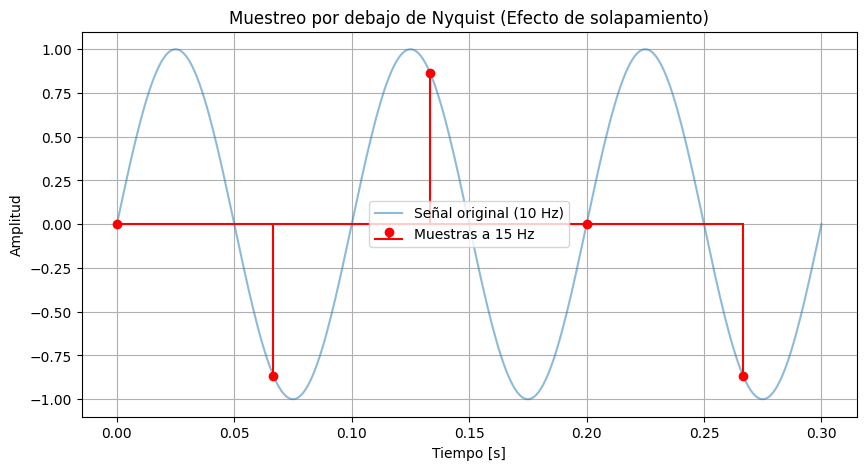

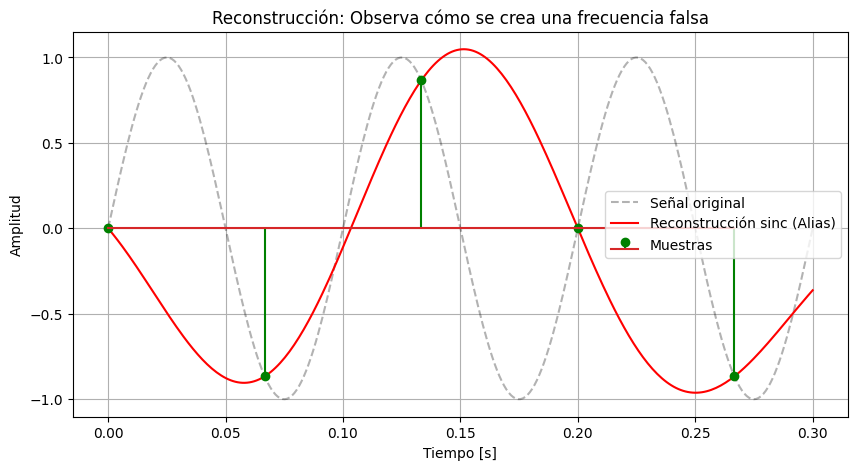

Nuestro error de reconstrucción: 0.929623


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Ejemplo de solapamiento (aliasing) e interpolación sinc
# ============================================================

# --- Parámetros de la señal ---
f = 10               # Frecuencia de la señal (Hz)
num_periodos = 3     
F_cont = 1000        

# --- Tiempo continuo y señal original ---
T = 1 / f
t_cont = np.linspace(0, num_periodos * T, int(num_periodos * T * F_cont))
x_cont = np.sin(2 * np.pi * f * t_cont)

# --- Muestreo por debajo de Nyquist (aliasing) ---
Fas = 15           # Frecuencia de muestreo (Nyquist pediría > 20 Hz)
Ts = 1 / Fas
t_s = np.arange(0, num_periodos * T, Ts)
x_s = np.sin(2 * np.pi * f * t_s)

# --- Interpolación sinc ---
def sinc_interpolacion(t, ts, xs):
    x_reconstruido = np.zeros_like(t)
    # Calculamos Ts de forma robusta
    intervalo_muestreo = ts[1] - ts[0]
    for i in range(len(xs)):
        x_reconstruido += xs[i] * np.sinc((t - ts[i]) / intervalo_muestreo)
    return x_reconstruido

x_sinc = sinc_interpolacion(t_cont, t_s, x_s)

# ============================================================
# Visualización del aliasing
# ============================================================

plt.figure(figsize=(10, 5))
plt.plot(t_cont, x_cont, label=f'Señal original ({f} Hz)', alpha=0.5)
# Eliminamos use_line_collection para evitar el error
plt.stem(t_s, x_s, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Muestras a {Fas} Hz')
plt.title('Muestreo por debajo de Nyquist (Efecto de solapamiento)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# ============================================================
# Visualización de la reconstrucción
# ============================================================

plt.figure(figsize=(10, 5))
plt.plot(t_cont, x_cont, 'k--', label='Señal original', alpha=0.3)
plt.plot(t_cont, x_sinc, 'r-', label='Reconstrucción sinc (Alias)')
plt.stem(t_s, x_s, linefmt='g-', markerfmt='go', label='Muestras')
plt.title('Reconstrucción: Observa cómo se crea una frecuencia falsa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# Error
err_sinc = np.mean((x_sinc - x_cont)**2)
print(f"Nuestro error de reconstrucción: {err_sinc:.6f}")

### Explicación:
En este ejemplo, la señal de 10 Hz es muestreada a 15 Hz (por debajo de la frecuencia de Nyquist), lo que genera solapamiento. La señal muestreada parece tener una frecuencia más baja de lo que realmente tiene.

1. Incumplimiento del Criterio de Nyquist

Nuestra señal tiene una frecuencia f=10 Hz. El límite de Nyquist exige que Fs​>2f (20 Hz). Al usar Fas​=15 Hz, estamos en la zona de submuestreo.

2. Generación de Frecuencia de Alias

Debido al submuestreo, las muestras obtenidas no contienen información suficiente para representar la rapidez de la señal original. La frecuencia del alias reconstruido se calcula mediante:
falias​=∣f−k⋅Fs​∣

En nuestro caso: ∣10−15∣=5 Hz. Por eso la línea roja de la reconstrucción oscila a la mitad de la velocidad de la original.

3. Función del Reconstructor Sinc

La función sinc_interpolacion actúa como un filtro paso bajo ideal.

    Su papel es eliminar todas las frecuencias por encima de Fs​/2 (7.5 Hz en nuestro caso).

    Al filtrar, solo deja pasar la componente de 5 Hz (el alias), que es la única que "sobrevive" en el espectro digital tras el muestreo insuficiente.

El error de reconstrucción (MSE) es alto porque estamos comparando dos señales de frecuencias distintas (10 Hz vs 5 Hz). Este código demuestra que, sin un filtro antialiasing previo o una Fs​ adecuada, la información original se pierde irreversiblemente.

---

## Conclusión

En esta primera parte de la práctica, hemos explorado los conceptos fundamentales del muestreo, cuantización, reconstrucción y solapamiento. Mediante visualizaciones, pudimos ver cómo cada proceso afecta a la señal original y cómo el solapamiento puede causar errores significativos cuando no se respeta la frecuencia de Nyquist.

---